<a href="https://colab.research.google.com/github/poovarasansivakumar2003/Marvel_Batch_4_works/blob/main/Task_8_Generative_AI_Task_Using_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 8: Generative AI Task Using GAN**
Generative Adversarial Networks (GANs) are a class of machine learning frameworks where two neural networks, the generator and the discriminator, compete against each other. The generator tries to create realistic synthetic data, while the discriminator attempts to distinguish between real and generated data. Through this adversarial process, the generator learns to produce increasingly realistic images.

#### **Steps to Implement a GAN**
<ol><li>

**Architecture Overview:**
<ul><li>

**Generator**: Takes random noise as input and generates synthetic images.
</li><li>

**Discriminator**: Takes real or generated images as input and classifies them as real or fake.</li>

These two models are trained simultaneously:
<ul><li>
The generator tries to fool the discriminator.
</li><li>
The discriminator tries to accurately classify real and fake images.
</li></ul>
</ul>
<li>

**Dataset**:

For generating images of a specific category, we can use publicly available datasets such as CelebA (for faces), CIFAR-10 (for animals or landscapes), or other relevant datasets.</li><li>

**Training**:

Both the generator and discriminator are trained in a loop where the generator improves in creating images, and the discriminator improves in detecting fake ones.</li></ol>

I used **TensorFlow** in the code because it's one of the most popular and widely used deep learning libraries for building neural networks, including GANs (Generative Adversarial Networks). TensorFlow provides many benefits for implementing GANs:

#### **Why TensorFlow?**
<ol><li>

**Ease of Use**: TensorFlow (and its high-level API Keras) simplifies building neural networks with minimal code, making it ideal for fast prototyping.</li><li>

**GPU Acceleration**: TensorFlow supports both CPU and GPU training. Leveraging GPUs speeds up GAN training significantly, which is important as GANs are computationally intensive.</li><li>

**High-level API (Keras)**: With Keras, TensorFlow provides a concise and flexible API for building models like GANs, reducing the complexity and boilerplate code compared to other frameworks.</li><li>

**Community Support and Documentation**: TensorFlow has vast documentation and a strong community. Many GAN tutorials, pretrained models, and optimizations are available, allowing you to get up to speed quickly.</li><li>

**Efficient Gradient Calculation**: TensorFlow's tf.GradientTape helps in computing gradients efficiently, which is essential for training GANs, where both the generator and discriminator need to be optimized in tandem.</li><li>

**TensorFlow Functions**: Functions like `@tf.function` help improve the speed of training by optimizing code execution (such as compiling operations ahead of time).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


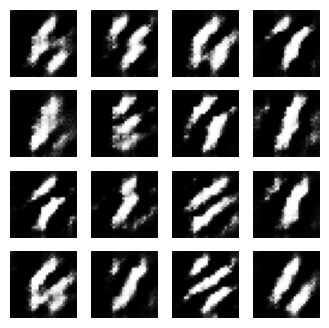

Epoch 1 completed


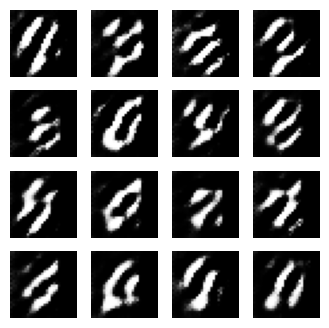

Epoch 2 completed


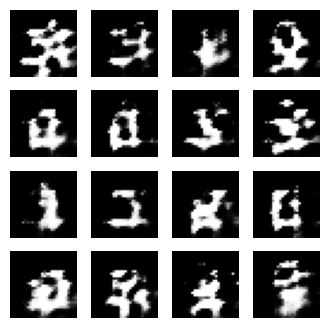

Epoch 3 completed


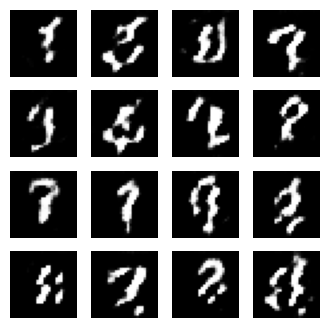

Epoch 4 completed


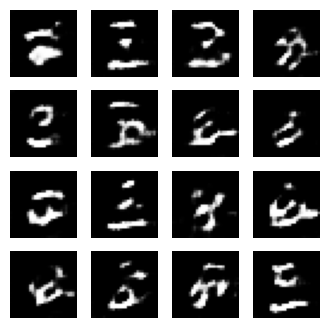

Epoch 5 completed


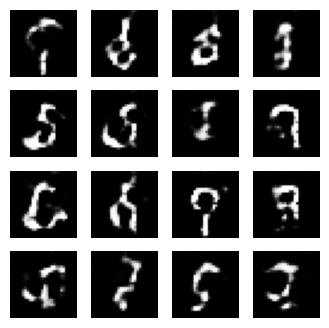

Epoch 6 completed


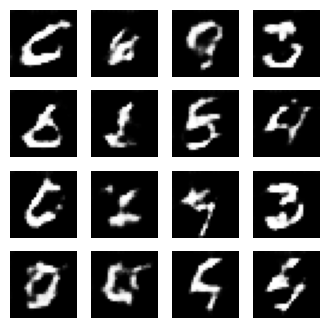

Epoch 7 completed


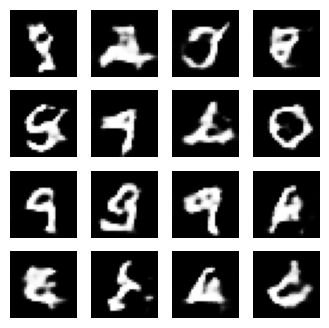

Epoch 8 completed


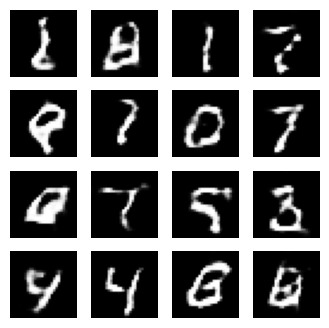

Epoch 9 completed


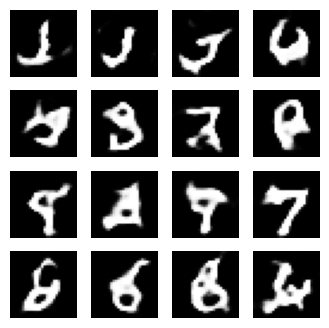

Epoch 10 completed


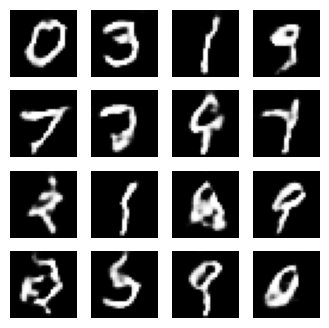

Epoch 11 completed


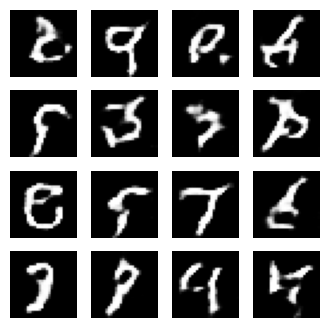

Epoch 12 completed


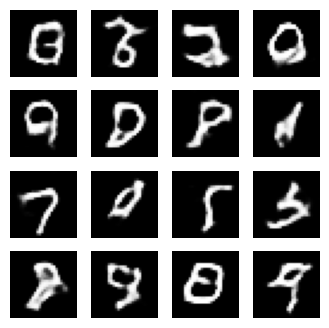

Epoch 13 completed


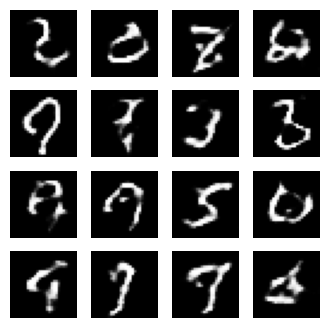

Epoch 14 completed


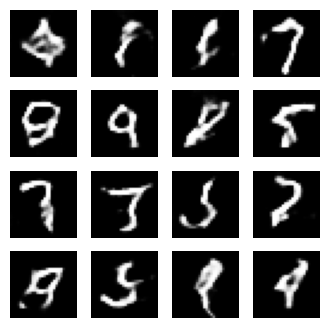

Epoch 15 completed


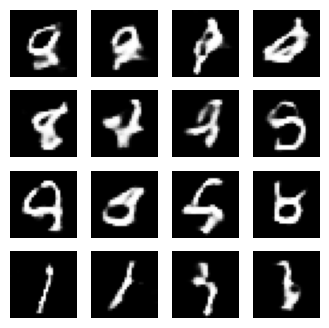

Epoch 16 completed


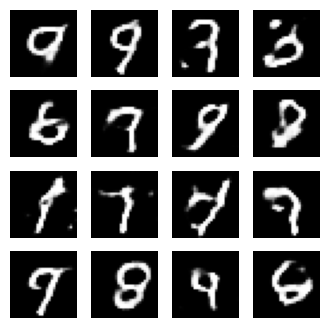

Epoch 17 completed


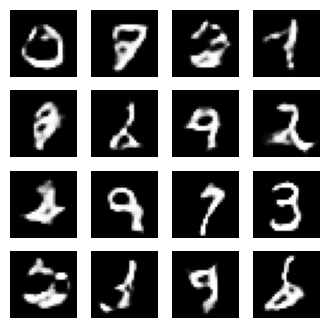

Epoch 18 completed


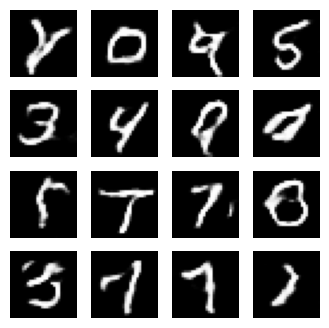

Epoch 19 completed


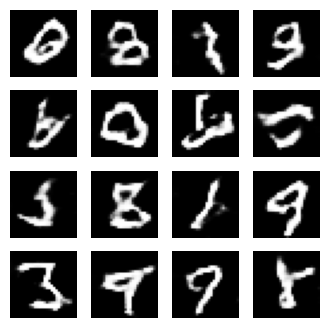

Epoch 20 completed


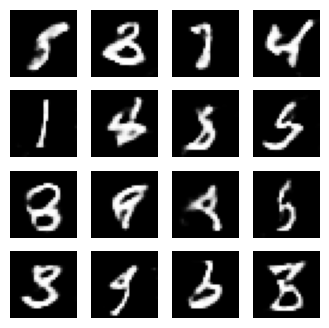

Epoch 21 completed


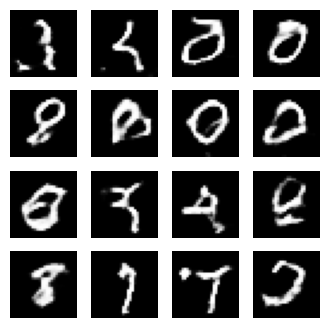

Epoch 22 completed


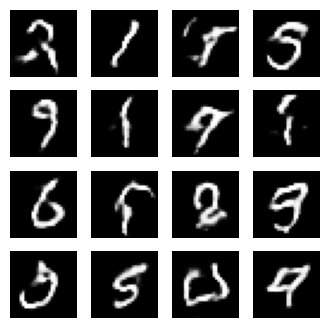

Epoch 23 completed


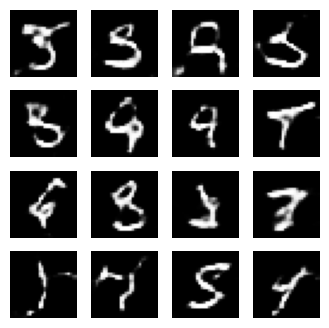

Epoch 24 completed


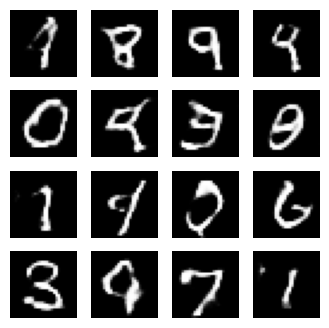

Epoch 25 completed


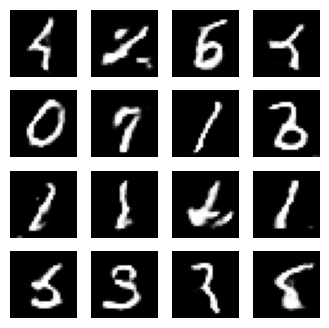

Epoch 26 completed


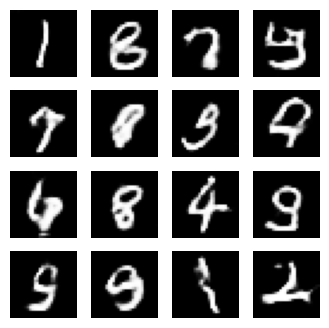

Epoch 27 completed


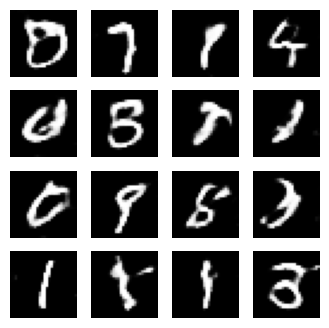

Epoch 28 completed


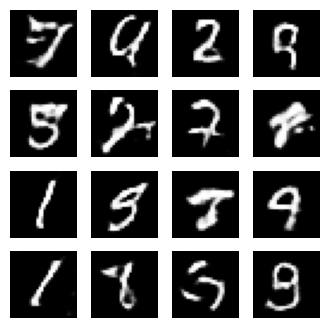

Epoch 29 completed


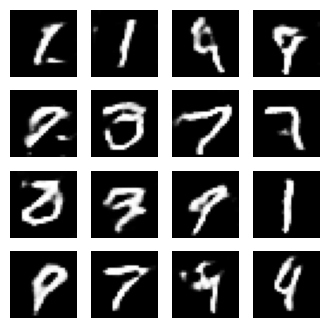

Epoch 30 completed


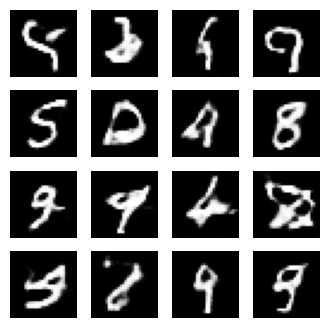

Epoch 31 completed


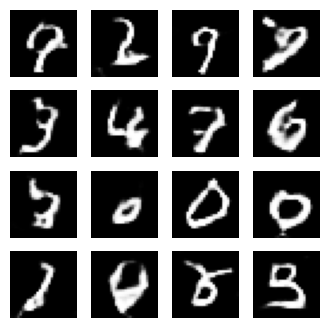

Epoch 32 completed


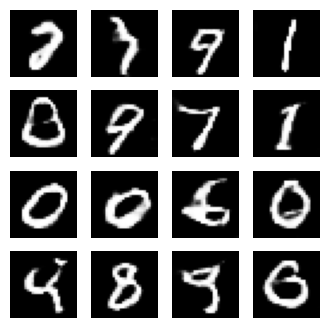

Epoch 33 completed


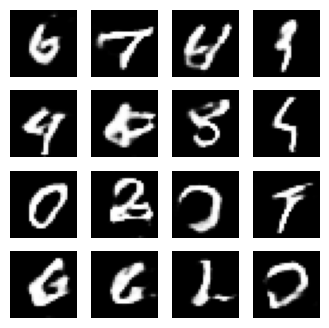

Epoch 34 completed


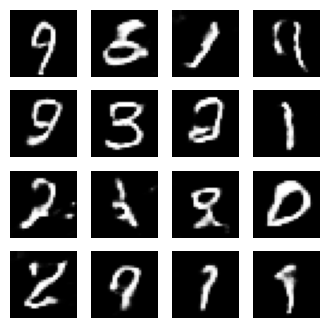

Epoch 35 completed


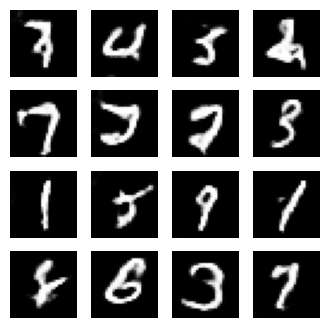

Epoch 36 completed


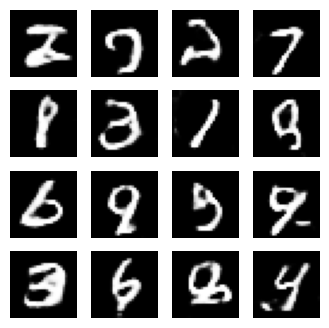

Epoch 37 completed


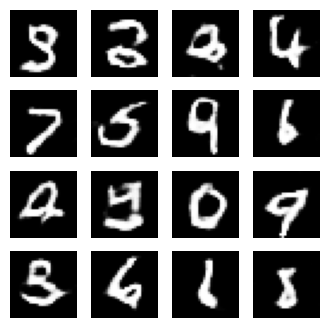

Epoch 38 completed


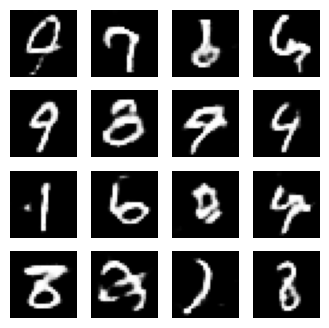

Epoch 39 completed


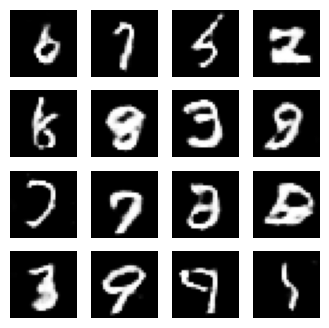

Epoch 40 completed


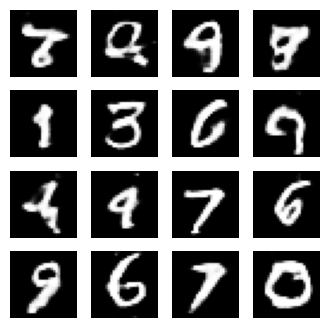

Epoch 41 completed


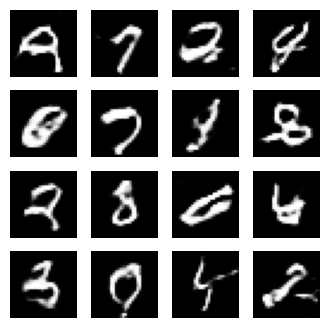

Epoch 42 completed


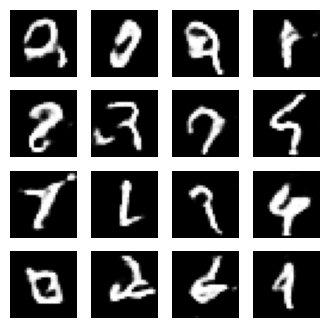

Epoch 43 completed


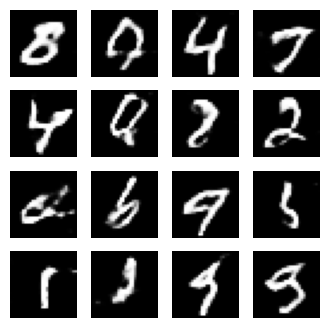

Epoch 44 completed


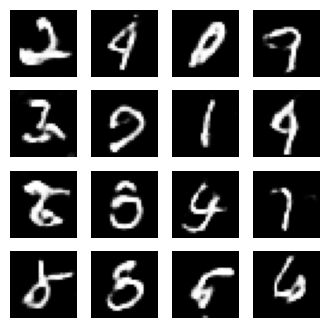

Epoch 45 completed


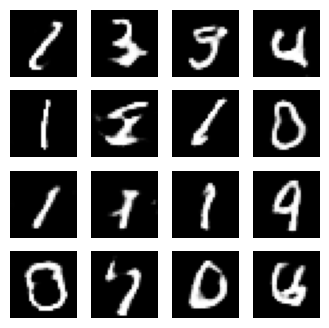

Epoch 46 completed


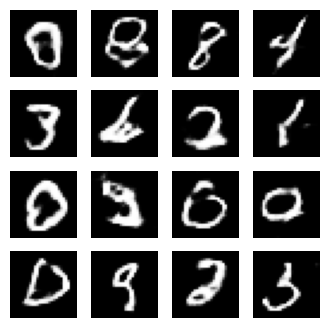

Epoch 47 completed


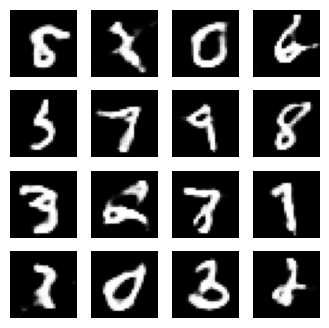

Epoch 48 completed


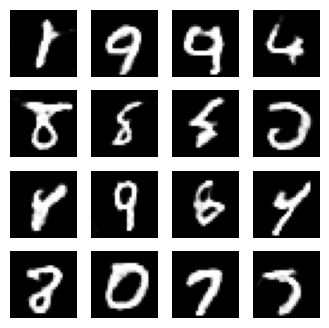

Epoch 49 completed


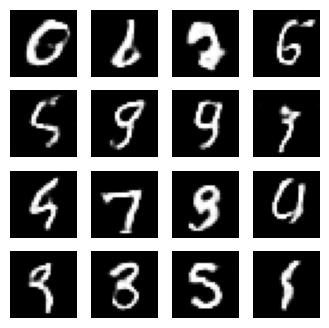

Epoch 50 completed


In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (MNIST dataset used, which trains quickly)
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_train = (x_train - 127.5) / 127.5  # Normalize to [-1, 1]

# Hyperparameters
BATCH_SIZE = 64
EPOCHS = 50
NOISE_DIM = 100

# Create batches(for better gradient flow and faster convergence)
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(BATCH_SIZE)

# Generator Model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(NOISE_DIM,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

# Discriminator Model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

# Loss and Optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Create Generator and Discriminator
generator = make_generator_model()
discriminator = make_discriminator_model()

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training step
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Training loop
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        # Produce images for the GIF as we go
        generate_and_save_images(generator, epoch + 1, tf.random.normal([16, NOISE_DIM]))

        print(f'Epoch {epoch+1} completed')

# Generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

# Start training
train(train_dataset, EPOCHS)


###**Key Components**:
<ol><li>

**Generator**:
<ul><li>
It takes random noise (latent_size vector) and generates an image of size 32x32x3.</li><li>
Uses ReLU activations and Tanh for the output layer.</li></ul></li><li>

**Discriminator**:
<ul><li>
Takes an image and outputs a probability indicating whether it is real or fake.</li><li>
Uses LeakyReLU activations for better gradient flow.</li></ul></li><li>

**Training**:
<ul><li>
The discriminator learns to differentiate real and generated images by minimizing the binary cross-entropy loss.</li><li>
The generator aims to "fool" the discriminator by generating realistic images.
After every epoch, we generate and save images using a fixed noise vector.</li></ul></li><li>

**Outcome**:
<ul><li>
After training, the generator produces increasingly realistic images of the chosen category (e.g., animals from CIFAR-10).</li><li>
Images are saved every 20 epochs for visual inspection of the generated samples' quality.</li></ul></li></ol>

###**Understanding GANs:**
<ul><li>

**Adversarial Nature**: The generator and discriminator are adversaries trying to outsmart each other, which leads to improvements in image generation quality.
</li><li>

**Applications**: GANs are used in tasks like image generation, style transfer, super-resolution, and more.</li></ul>